<a href="https://colab.research.google.com/github/pascale25/Deep_learning/blob/master/CNN_Visual_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
# library of computeur vision

In [87]:
import torchvision
import torch
from torch import nn
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


In [88]:
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


In [89]:
# getting the dataset
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)


In [90]:
len(train_data), len(test_data)

(60000, 10000)

In [91]:
# See first training sample
image, label = train_data[0]
image, label


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [92]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [93]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

# input ans output shape

In [94]:
image.shape, label # has only color channel [c,H,W]

(torch.Size([1, 28, 28]), 9)

In [95]:
print(f"image shape: {image.shape}' -> [color_channels, height, witth]")
print(f"Image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28])' -> [color_channels, height, witth]
Image label: Ankle boot


##  visualize the data 

torch.Size([1, 28, 28])


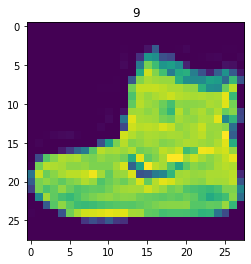

In [96]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

torch.Size([1, 28, 28])


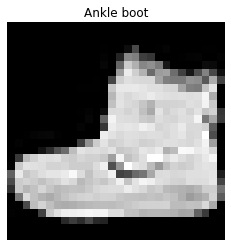

In [97]:
image, label = train_data[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
plt.show()

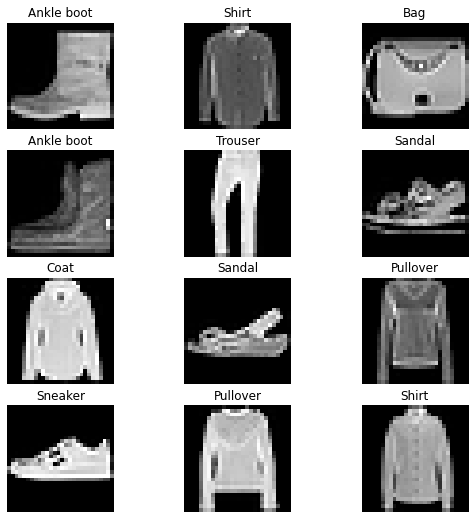

In [98]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 3
for i in range (1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)



In [99]:
# prepare dataloader 

In [100]:
train_data , test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(), Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [147]:
# Prepare DataLoader
from torch.utils.data import DataLoader
BATH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, 
                                batch_size= BATH_SIZE,
                                shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                               batch_size = BATH_SIZE,
                               shuffle = False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd593f14e10>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd593f145d0>)

In [102]:
print(len(train_dataloader), BATH_SIZE)
print(len(test_dataloader), BATH_SIZE)

1875 32
313 32


In [103]:
train_features_bath, train_labels_bath = next(iter(train_dataloader))
train_features_bath.shape, train_labels_bath.shape # bath_size, channel, height, width, 32 labels associated

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

torch.Size([1, 28, 28])
tensor(5) torch.Size([])


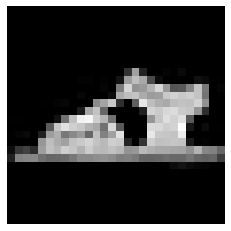

In [124]:
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_bath), size=[1]).item()
img, label = train_features_bath[random_idx], train_labels_bath[random_idx]
plt.imshow(img.squeeze(), cmap ='gray')
plt.axis(False)
print(img.shape)
print(label, label.shape)



In [105]:
from matplotlib.cbook import flatten
# best to stard with a base line model , a simple mmodel/ model experiemnt

flatten_model = nn.Flatten()
# get one sample of the training
x = train_features_bath[0]
x.shape

torch.Size([1, 28, 28])

In [106]:
output = flatten_model(x)
print(x.shape)
print(output.shape)
# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

torch.Size([1, 28, 28])
torch.Size([1, 784])
Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [112]:
from torch.nn.modules.linear import Linear
from torch import nn
class FashionMNISTVModelV0(nn.Module):
  def __init__(self, input_shape: int, hidden_units:int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features = output_shape))
    
  def forward(self, x):
    return self.layer_stack(x)

In [108]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x):
        return self.layer_stack(x)

In [116]:
model_01 = FashionMNISTVModelV0(input_shape=28*28, # 784
                         hidden_units= 10,
                         output_shape = len(class_names)).to('cpu') # one for every class # keep model on CPU to begin with
model_01

FashionMNISTVModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [110]:
len(class_names)

10

In [117]:
dummy_x = torch.rand([1,1,28,28])
model_01(dummy_x)
  

tensor([[ 0.0575, -0.3783,  0.5014,  0.0059,  0.3790, -0.0273, -0.4599,  0.1207,
         -0.2569, -0.0119]], grad_fn=<AddmmBackward0>)

In [125]:
model_01.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0155,  0.0306,  0.0246,  ...,  0.0224, -0.0092, -0.0086],
                      [-0.0144,  0.0352,  0.0170,  ..., -0.0348, -0.0136,  0.0251],
                      [-0.0035,  0.0120, -0.0299,  ...,  0.0303,  0.0118,  0.0150],
                      ...,
                      [-0.0140, -0.0012, -0.0334,  ...,  0.0141, -0.0057, -0.0125],
                      [-0.0098, -0.0349, -0.0275,  ..., -0.0030, -0.0174,  0.0216],
                      [ 0.0255, -0.0056, -0.0067,  ...,  0.0323,  0.0278, -0.0057]])),
             ('layer_stack.1.bias',
              tensor([ 0.0350,  0.0022,  0.0286, -0.0316, -0.0333,  0.0100, -0.0003, -0.0303,
                      -0.0200,  0.0200])),
             ('layer_stack.2.weight',
              tensor([[ 0.2016, -0.2398, -0.1414,  0.0018, -0.0004, -0.2329,  0.2339, -0.2208,
                        0.2250, -0.1956],
                      [-0.3142,  0.0788, -0.1513,  0.2132, -0.1048,  0.0302,  0.

In [126]:
#  helper function of pytorch 
import requests
from pathlib import Path

if Path ("helper_function").is_file():
  print("helper_function.py already exists, skipping dowlaord ...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/pascale25/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [127]:
from helper_functions import accuracy_fn
loss_fun = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_01.parameters(), lr = 0.01 )

In [145]:
#create a function to time oiur experiemnt
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

Let's step through it:

Loop through epochs.

Loop through training batches, perform training steps, calculate the train loss per batch.

Loop through testing batches, perform testing steps, calculate the test loss per batch.

Print out what's happening.

Time it all (for fun).

##  Creating a training loop and training a model on batches of data

In [144]:
from torch.nn.modules import loss
from tqdm.auto import tqdm 

torch.manual_seed(42) # set the seed
train_time_start_on_cpu = timer()

epochs = 3
# train and test loop
for epoch in tqdm(range(epochs)):
  print(f'Epch: {epoch}\n----')
  ### training
  train_loss = 0
  ## loop on training data
  for batch, (X,y) in enumerate(train_dataloader):
    model_01.train()
    # forward pass
    y_pred = model_01(X)
    # calculate the loss
    loss = loss_fun(y_pred, y)
    train_loss +=loss # accumulate train loss
    # optimizer
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer next step
    optimizer.step()
    if batch % 400 == 0:
      print(f"Looked at{batch *len(X)}/{len(train_dataloarder.dataset)} sample")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)


# testin loop
test_loss, test_acc = 0, 0
model_01.eval()
with torch.inference_mode():
  for X, y in test_dataloader:
    # forward pass
    test_pred = model_01(X)
    # calculate the loss 
    test_loss += loss_fun(test_pred, y)
    test_acc += accuracy_fn(y_true = y, y_pred=test_pred.argmax(dim=1))
    # test loss average per bacth 
    test_loss /=len(test_dataloarder)
    test_acc /= len(test_dataloarder)


# print loss
print (f"\ntrain loss: {train_loss:.4f} | Test less: {test_loss:.4}, Test acc: {test_acc:.4f}")

# training time
train_time_start_on_cpu = timer()
total_train_tine_model_01 = print_train_time(start=train_time_start_on_cpu, 
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epch: 0
----
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample
Epch: 1
----
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample
Epch: 2
----
Looked at0/60000 sample
Looked at12800/60000 sample
Looked at25600/60000 sample
Looked at38400/60000 sample
Looked at51200/60000 sample

train loss: 0.0002 | Test less: 0.001323, Test acc: 0.2604


NameError: ignored